In [2]:
import sys
sys.path.append('../lib/python/')

import moving_edges

import matplotlib.pyplot as plt
import cv2
import numpy as np
from tabulate import tabulate

plt.rcParams['mathtext.fontset'] = 'cm'
import os
save_filepath = os.getcwd() + "/../figures/"


plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'

(251, 927)


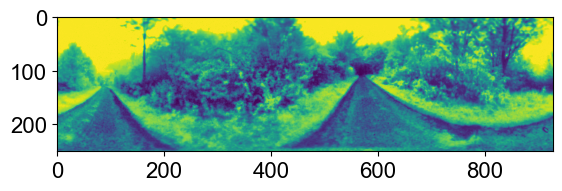

In [10]:
image = cv2.imread('0051_120518-142858_tonemapped.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
print(np.shape(image))


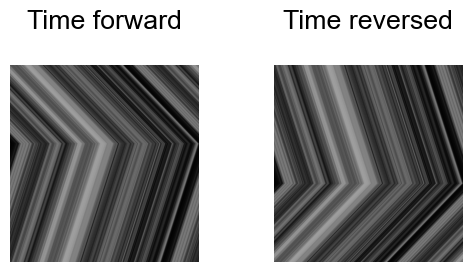

In [13]:
fig = plt.figure(figsize = (5, 3))
ax = plt.subplot(121)
plt.title("Time forward\n")
arr = np.zeros((927, 927 * 3))
row = image[100, :]
arr[0, :] = row.repeat(3)
for i in range(1, np.shape(arr)[0]*2//5):
    arr[i, :] = np.roll(arr[i-1, :], 3)
for i in range(np.shape(arr)[0]*2//5, np.shape(arr)[0]):
    arr[i, :] = np.roll(arr[i-1, :], -1)
plt.imshow(arr, cmap = "grey", aspect = 'auto', vmin = 0, vmax = 400)
ax.set_axis_off()
ax = plt.subplot(122)
plt.title("Time reversed\n")
plt.imshow(arr[::-1, :], cmap = "grey", aspect = 'auto', vmin = 0, vmax = 400)
ax.set_axis_off()

plt.tight_layout()
plt.subplots_adjust(wspace = 0.4)

plt.savefig(save_filepath + 'fig1/local_velocities.pdf', bbox_inches = 'tight')
plt.savefig(save_filepath + 'fig1/local_velocities.png', bbox_inches = 'tight')
